In [1]:
# Data analysis for Project 1 DL KR

In [2]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the data
with open('./results/aggregate_results.json', 'r') as f:
    data = json.load(f)

# Prepare the data for visualization
df = pd.DataFrame({
    'ontology': [ontology for ontology in data.keys() for _ in data[ontology]],
    'Reasoner': [reasoner for results in data.values() for reasoner in results.keys()],
    'Total Time': [metrics['total_time'] for results in data.values() for metrics in results.values()],
    'std_dev': [metrics['std_dev'] for results in data.values() for metrics in results.values()]
})

# Remove .owl.xml from ontology names
df['ontology'] = df['ontology'].str.replace('.owl.xml', '')

# Order the data by total time
df = df.sort_values('Total Time', ascending=False)


/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/matt/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



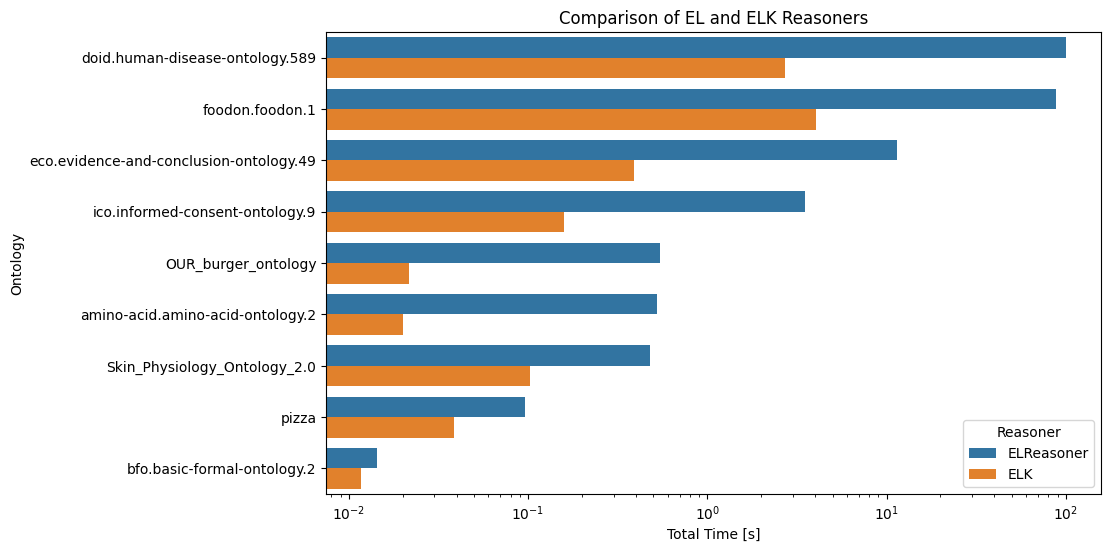

In [8]:


# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Time', y=df.ontology, hue=df.Reasoner, data=df)

# Set the x-axis to logarithmic scale
plt.xscale('log')

plt.title('Comparison of EL and ELK Reasoners')
plt.xlabel('Total Time [s]')
plt.ylabel('Ontology')
plt.savefig('all_ontologies_log_time.png')
plt.show()

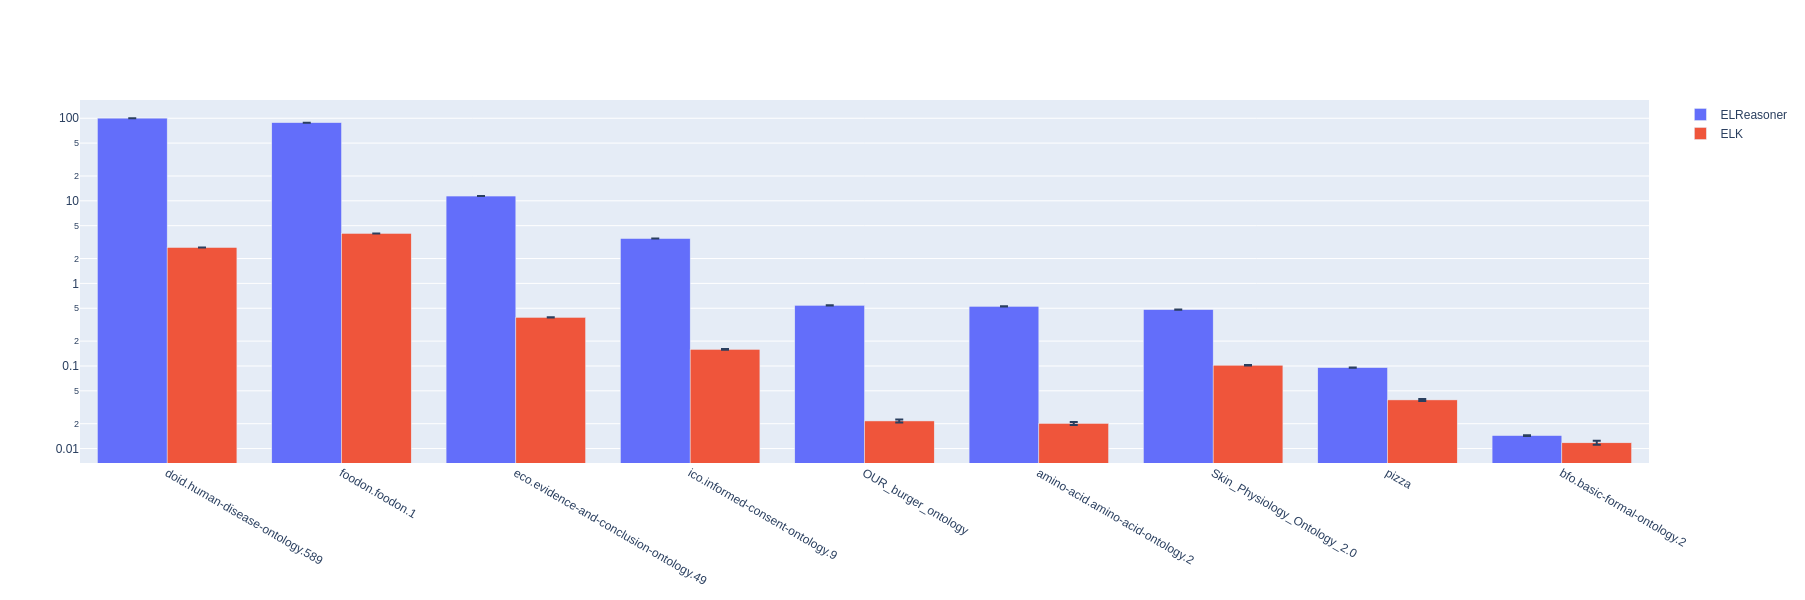

In [9]:
import plotly.graph_objects as go
import plotly.io as py

fig = go.Figure()

# Get the unique reasoners from the DataFrame
unique_reasoners = df['Reasoner'].unique()

for reasoner in unique_reasoners:
    # Filter the DataFrame for each reasoner
    df_reasoner = df[df['Reasoner'] == reasoner]

    fig.add_trace(go.Bar(
        name=reasoner,
        x=df_reasoner['ontology'], 
        y=df_reasoner['Total Time'],
        error_y=dict(type='data', array=df_reasoner['std_dev']),
    ))

fig.update_layout(
    barmode='group',
    xaxis={'categoryorder':'array', 'categoryarray':df['ontology'].tolist()},
    autosize=False,
    width=800,
    height=600,
)
fig.update_yaxes(type="log")  # Update y-axis to log scale
# py.write_image(fig, 'all_onto_log_bar_with_error.png')
fig.show()
